In [2]:
%%HTML
<link rel="stylesheet" type="text/css" href="//fonts.googleapis.com/css?family=Quicksand:300" />
<link rel="stylesheet" type="text/css" href="custom.css">

### Classifying movie reviews: a binary classification example

We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously you don't need your model to predict those). For instance, it is possible that your model could end up merely memorizing a mapping between your training samples and their targets -- which would be completely useless for the task of predicting targets for data never seen before. We will go over this point in much more detail in the next chapter.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

ModuleNotFoundError: No module named 'keras'


The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

The variables train_data and test_data are lists of reviews, each review being a list of word indices (encoding a sequence of words).  train_labels and test_labels are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [22]:
train_data.shape

(25000,)

In [24]:
# train_data[0]

In [6]:
train_labels[0]

1

In [25]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers 

![center half](images/dense_imdb.png)

In [60]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [61]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [63]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)

Train on 12000 samples, validate on 3000 samples
Epoch 1/10
12000/12000 [==============================] - 1s 99us/step - loss: 0.5381 - acc: 0.7750 - val_loss: 0.4442 - val_acc: 0.8287
Epoch 2/10
12000/12000 [==============================] - 1s 72us/step - loss: 0.3381 - acc: 0.9011 - val_loss: 0.3372 - val_acc: 0.8757
Epoch 3/10
12000/12000 [==============================] - 1s 71us/step - loss: 0.2472 - acc: 0.9240 - val_loss: 0.3021 - val_acc: 0.8793
Epoch 4/10
12000/12000 [==============================] - 1s 71us/step - loss: 0.1940 - acc: 0.9416 - val_loss: 0.2940 - val_acc: 0.8813
Epoch 5/10
12000/12000 [==============================] - 1s 73us/step - loss: 0.1532 - acc: 0.9551 - val_loss: 0.2918 - val_acc: 0.8807
Epoch 6/10
12000/12000 [==============================] - 1s 71us/step - loss: 0.1242 - acc: 0.9643 - val_loss: 0.3193 - val_acc: 0.8783
Epoch 7/10
12000/12000 [==============================] - 1s 73us/step - loss: 0.1047 - acc: 0.9693 - val_loss: 0.3171 - val_acc:

In [56]:
import matplotlib.pyplot as plt
def plot(valid_val, train_val, title, x_label, y_label):
    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, train_val, 'bo', label=f'Training {y_label}')
    # b is for "solid blue line"
    plt.plot(epochs, valid_val, 'b', label=f'Validation {y_label}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

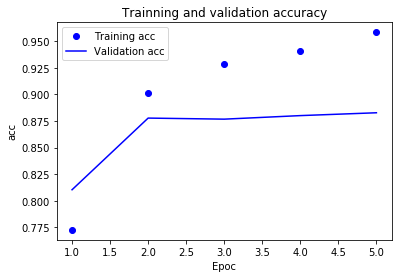

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plot(val_acc, acc , "Trainning and validation accuracy", 'Epoc', 'acc')

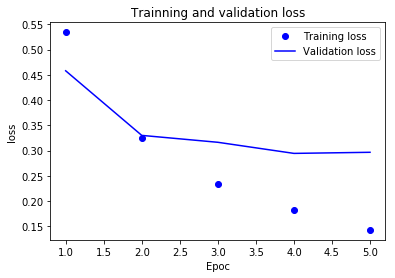

In [58]:
acc = history.history['loss']
val_acc = history.history['val_loss']

plot(val_acc, acc , "Trainning and validation loss", 'Epoc', 'loss')

# [Next: Basics of Keras Convolution Net](04_01_basics_of_keras_convolution_net.ipynb)